# **Tugas Kelompok Pembelajaran Mesin - Problem 1 (Clustering)**

Nama Anggota Kelompok:
1. Rusyda Tsaniya Eka Putri (22/511227/NPA/19855)
2. Dicky Setiawan (22/511229/NPA/19857)

**Problem 1: Clustering**

**Customer segmentation** merupakan kegiatan memisahkan pelanggan ke dalam kelompok-kelompok yang mencerminkan kesamaan di antara pelanggan di setiap cluster. Pemilik toko ingin membagi pelanggan menjadi beberapa segmen untuk mengoptimalkan minat setiap pelanggan bagi bisnis dan kemudian memodifikasi produk sesuai dengan kebutuhan dan perilaku pelanggan yang berbeda. Hal ini juga membantu bisnis untuk memenuhi kekhawatiran berbagai jenis pelanggan. Dalam proyek ini, Anda perlu melakukan pengelompokan data dengan ***unsupervised learning*** pada *record* pelanggan dari data perusahaan bahan makanan (https://drive.google.com/file/d/11mmwgxWwnfF3PUhsELG8NkbpWeFHZoUW/view) dan menjawab pertanyaan dengan petunjuk berikut.

## **a.**
*Load* dataset dan tampilkan 10 data pertama.

In [ ]:
# Mengimpor library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram

In [ ]:
# Menghubungkan Google Drive dan Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Mengambil dataset
dataset = '/content/gdrive/MyDrive/marketing_campaign.csv'
df = pd.read_csv(dataset, header=None)

In [ ]:
# Menampilkan 10 data pertama
df.head(10)

,0
0,ID\tYear_Birth\tEducation\tMarital_Status\tInc...
1,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
2,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
3,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
4,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
5,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...
6,7446\t1967\tMaster\tTogether\t62513\t0\t1\t09-...
7,965\t1971\tGraduation\tDivorced\t55635\t0\t1\t...
8,6177\t1985\tPhD\tMarried\t33454\t1\t0\t08-05-2...
9,4855\t1974\tPhD\tTogether\t30351\t1\t0\t06-06-...


Tampak bahwa semula data yang ada tidak dipisah, maka perlu adanya pemisahan antar kolom dan juga isi datanya.

Kemudian dilakukan pemberian/perubahan nama kolom sementara dengan nama 'columns' untuk mempermudah proses pemisahan selanjutnya.

In [ ]:
# Mengganti nama column/atribut

df = df.drop(index=0).reset_index(drop=True)
col_names = ['columns']
df.columns = col_names
col_names

['columns']

In [ ]:
df.head(10)

,columns
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...
5,7446\t1967\tMaster\tTogether\t62513\t0\t1\t09-...
6,965\t1971\tGraduation\tDivorced\t55635\t0\t1\t...
7,6177\t1985\tPhD\tMarried\t33454\t1\t0\t08-05-2...
8,4855\t1974\tPhD\tTogether\t30351\t1\t0\t06-06-...
9,5899\t1950\tPhD\tTogether\t5648\t1\t1\t13-03-2...


Nama kolom sudah ada dan selanjutnya dilakukan proses pemisahan antar kolom.

In [ ]:
# Pemisahan nilai pada setiap baris berdasarkan delimiter
df_split = df['columns'].str.split('\t', expand=True)

# Menambahkan kolom baru ke DataFrame
df_new = df.assign(ID=df_split[0],
                   Year_Birth=df_split[1],
                   Education=df_split[2],
                   Marital_Status=df_split[3],
                   Income=df_split[4],
                   Kidhome=df_split[5],
                   Teenhome=df_split[6],
                   Dt_Customer=df_split[7],
                   Recency=df_split[8],
                   MntWines=df_split[9],
                   MntFruits=df_split[10],
                   MntMeatProducts=df_split[11],
                   MntFishProducts=df_split[12],
                   MntSweetProducts=df_split[13],
                   MntGoldProds=df_split[14],
                   NumDealsPurchases=df_split[15],
                   NumWebPurchases=df_split[16],
                   NumCatalogPurchases=df_split[17],
                   NumStorePurchases=df_split[18],
                   NumWebVisitsMonth=df_split[19],
                   AcceptedCmp3=df_split[20],
                   AcceptedCmp4=df_split[21],
                   AcceptedCmp5=df_split[22],
                   AcceptedCmp1=df_split[23],
                   AcceptedCmp2=df_split[24],
                   Complain=df_split[25],
                   Z_CostContact=df_split[26],
                   Z_Revenue=df_split[27],
                   Response=df_split[28]
                   )

# Menampilkan DataFrame dengan kolom baru
df_new

,columns,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870\t1967\tGraduation\tMarried\t61223\t0\t1\...,10870,1967,Graduation,Married,61223,0,1,13-06-2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,4001\t1946\tPhD\tTogether\t64014\t2\t1\t10-06-...,4001,1946,PhD,Together,64014,2,1,10-06-2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,7270\t1981\tGraduation\tDivorced\t56981\t0\t0\...,7270,1981,Graduation,Divorced,56981,0,0,25-01-2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,8235\t1956\tMaster\tTogether\t69245\t0\t1\t24-...,8235,1956,Master,Together,69245,0,1,24-01-2014,8,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df = df_new.drop(columns='columns')

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


**Proses pemisahan kolom sudah selesai dan berikut adalah tampilan dari 10 data.**

In [ ]:
# Menampilkan 10 data pertama dari data yang telah dipisahkan
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


## **b.**
Menggunakan *library* pandas, dapatkan informasi fitur data, sehingga Anda memahami langkah apa yang harus Anda ambil untuk membersihkan dataset. (gunakan: info())
* Apakah ada *missing values*?
* Apakah ada *categorical features*?
* Apa yang harus Anda lakukan jika ada beberapa *categorical features*?

In [ ]:
# Mendapatkan informasi fitur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   object
 1   Year_Birth           2240 non-null   object
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   object
 5   Kidhome              2240 non-null   object
 6   Teenhome             2240 non-null   object
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   object
 9   MntWines             2240 non-null   object
 10  MntFruits            2240 non-null   object
 11  MntMeatProducts      2240 non-null   object
 12  MntFishProducts      2240 non-null   object
 13  MntSweetProducts     2240 non-null   object
 14  MntGoldProds         2240 non-null   object
 15  NumDealsPurchases    2240 non-null   object
 16  NumWeb

### **Mengecek Missing Value**

In [ ]:
# Mengecek apakah terdapat missing value
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Berdasarkan hasil pengecekan di atas, tampak bahwa **tidak terdapat adanya missing value dan data dinyatakan bersih**.

### **Mengecek Categorical Features**

In [ ]:
# Menampilkan kolom dengan tipe data kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns

# Menampilkan jumlah nilai unik dalam setiap kolom kategorikal
for column in categorical_columns:
    unique_values = df[column].nunique()
    print(f"Kolom {column} memiliki {unique_values} nilai unik.")

Kolom ID memiliki 2240 nilai unik.
Kolom Year_Birth memiliki 59 nilai unik.
Kolom Education memiliki 5 nilai unik.
Kolom Marital_Status memiliki 8 nilai unik.
Kolom Income memiliki 1975 nilai unik.
Kolom Kidhome memiliki 3 nilai unik.
Kolom Teenhome memiliki 3 nilai unik.
Kolom Dt_Customer memiliki 663 nilai unik.
Kolom Recency memiliki 100 nilai unik.
Kolom MntWines memiliki 776 nilai unik.
Kolom MntFruits memiliki 158 nilai unik.
Kolom MntMeatProducts memiliki 558 nilai unik.
Kolom MntFishProducts memiliki 182 nilai unik.
Kolom MntSweetProducts memiliki 177 nilai unik.
Kolom MntGoldProds memiliki 213 nilai unik.
Kolom NumDealsPurchases memiliki 15 nilai unik.
Kolom NumWebPurchases memiliki 15 nilai unik.
Kolom NumCatalogPurchases memiliki 14 nilai unik.
Kolom NumStorePurchases memiliki 14 nilai unik.
Kolom NumWebVisitsMonth memiliki 16 nilai unik.
Kolom AcceptedCmp3 memiliki 2 nilai unik.
Kolom AcceptedCmp4 memiliki 2 nilai unik.
Kolom AcceptedCmp5 memiliki 2 nilai unik.
Kolom Accept

Berdasarkan hasil pengecekan categorical features, tampak bahwa tentunya setiap kolom/atribut pasti memiliki nilai unik/kategorikal masing-masing.

###  **Yang Harus Dilakukan Jika Ada Beberapa Categorical Features**

Jika terdapat  beberapa fitur kategorikal dalam DataFrame, maka yang harus dilakukan adalah kurang lebih sama dengan langkah pengecekan sebelumnya yakni dengan mengenali dan menghitung berapa jumlah nilai kategorikal atau nilai unik (unique value) yang ada pada data setiap atribut tersebut.

## **c.**
Lakukan pembersihan data (*data cleaning*) dengan menghapus baris yang memiliki *missing values*.

In [ ]:
# Pembersihan data - hapus baris dengan missing values
df = df.dropna()

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

**Data telah dinyatakan bersih.**

## **d.**
Lakukan langkah-langkah berikut untuk merekayasa beberapa fitur baru (*feature engineering*):

* Buatlah fitur "Customer_For" yang menunjukkan jumlah hari pelanggan mulai berbelanja di toko terhadap tanggal terakhir yang tercatat (pelanggan terbaru dalam catatan). Gunakan fitur "Dt_Customer" yang menunjukkan jumlah hari seorang pelanggan terdaftar di database perusahaan.
* Ekstrak fitur "Age"  pelanggan berdasarkan "Year_Birth" yang menunjukkan tahun lahir orang yang bersangkutan.
* Buat fitur lain "Spent" yang menunjukkan jumlah total yang dibelanjakan oleh pelanggan dalam berbagai kategori selama rentang waktu dua tahun.
* Buat fitur lain "Living_With" dari "Marital_Status" untuk mengekstrak situasi kehidupan pasangan.
* Buat fitur "Children" untuk menunjukkan jumlah anak dalam sebuah rumah tangga yaitu, anak-anak (kids) dan remaja (teenagers).
* Untuk mendapatkan kejelasan lebih lanjut tentang rumah tangga, buatlah fitur yang menunjukkan "Family_Size"
* Buat fitur "Is_Parent" untuk menunjukkan status orang tua
* Buatlah tiga kategori dalam "Education" dengan menyederhanakan hitungan nilainya.
* Hapus beberapa fitur yang berulang (redundant features)




In [ ]:
# Membuat fitur "Customer_For"
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']) # Mengubah tipe data ke datetime
latest_date = df['Dt_Customer'].max() # Tanggal terbaru dalam catatan
df['Customer_For'] = (latest_date - df['Dt_Customer']).dt.days

# Ekstraksi fitur "Age" dari "Year_Birth"
df['Year_Birth'] = df['Year_Birth'].astype(int) # Mengubah tipe data kolom "Year_Birth" menjadi integer
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Membuat fitur "Spent"
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Spent'] = df[categories].sum(axis=1)

# Membuat fitur "Living_With"
df['Living_With'] = df['Marital_Status'].replace({'Single': 'Alone', 'Married': 'With Spouse', 'Together': 'With Spouse', 'Divorced': 'Alone', 'Widow': 'Alone'})

# Membuat fitur "Children"
df['Children'] = df['Kidhome'] + df['Teenhome']

# Membuat fitur "Family_Size"
df['Family_Size'] = df['Children'].astype(str) + '2'  # ditambahkan '2' (dalam bentuk string) untuk pasangan suami-istri

# Membuat fitur "Is_Parent"
df['Children'] = pd.to_numeric(df['Children'], errors='coerce') # Konversi kolom "Children" ke tipe data numerik
df['Is_Parent'] = df['Children'].apply(lambda x: True if x > 0 else False)


# Mengubah tiga kategori dalam "Education"
df['Education'] = df['Education'].replace({'Basic': 'Low', 'Graduation': 'Medium', 'Master': 'High', 'PhD': 'High'})

# Menghapus fitur yang redundan
redundant_features = ['Year_Birth', 'Kidhome', 'Teenhome']
df = df.drop(redundant_features, axis=1)

<ipython-input-67-7d16688b6686>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']) # Mengubah tipe data ke datetime


## **e.**
Analisis **statistik deskriptif** dari data menggunakan *library* pandas (gunakan: describe())

In [ ]:
df.describe()

,Customer_For,Age,Spent,Children
count,2240.000000,2240.000000,2.240000e+03,2240.000000
mean,512.043304,54.194196,5.757045e+15,4.948214
std,232.229893,11.984069,5.350915e+16,5.391837
min,0.000000,27.000000,6.260000e+02,0.000000
25%,340.750000,46.000000,1.350081e+08,0.000000
50%,513.000000,53.000000,6.338275e+10,1.000000
75%,685.250000,64.000000,7.123251e+13,10.000000
max,1063.000000,130.000000,1.132134e+18,21.000000


## **f.**
Buatlah grafik (*plot*) dari beberapa fitur yang dipilih ("Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent") untuk melihat *outlier* dalam data menggunakan *library* seaborn.


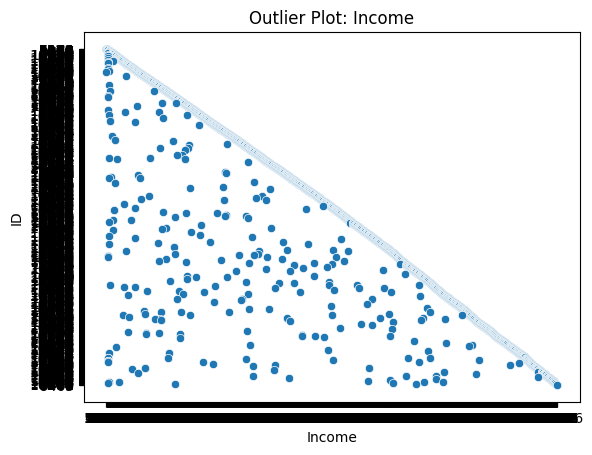

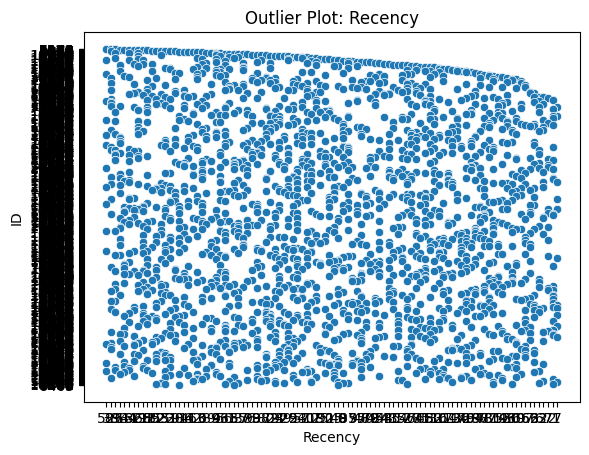

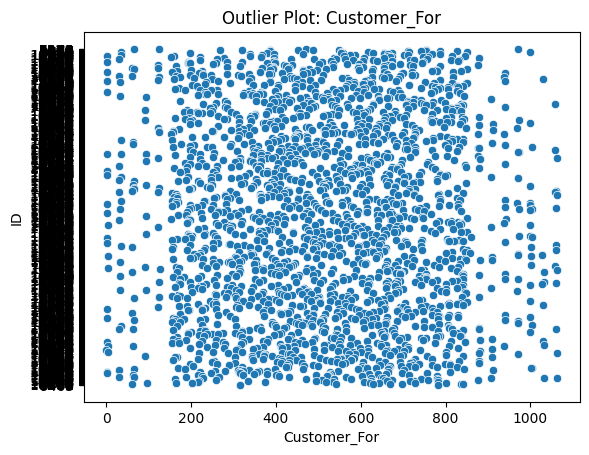

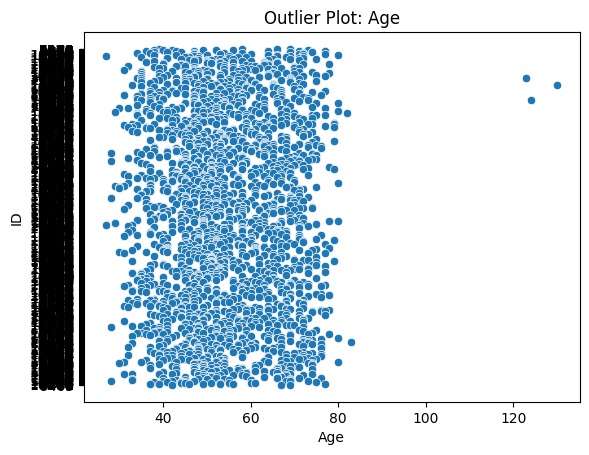

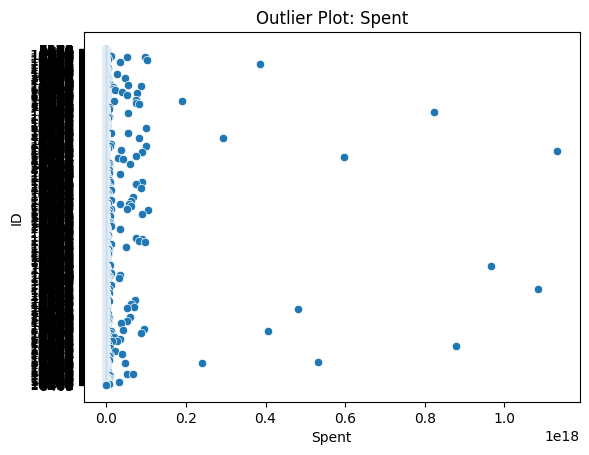

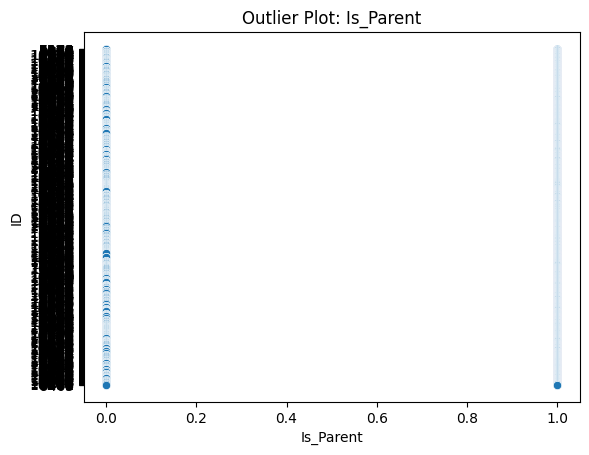

In [ ]:
# Memilih fitur yang akan diplot
selected_features = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]

# Membuat scatter plot untuk setiap fitur
for feature in selected_features:
    sns.scatterplot(data=df, x=feature, y="ID")
    plt.title(f"Outlier Plot: {feature}")
    plt.show()

## **g.**
**Hapuslah** ***outlier*** dengan menetapkan batas pada fitur yang memiliki sedikit *outlier*.

In [ ]:
# Daftar fitur yang akan dihapus outlier-nya
selected_features = ["Age"]

# Lower dan upper bounds untuk deteksi outlier
lower_bound = 0.05
upper_bound = 0.95

# Menghapus outlier pada setiap fitur
for feature in selected_features:
    if df[feature].dtype == np.number:  # Memeriksa tipe data numerik
        q_low = df[feature].quantile(lower_bound)
        q_high = df[feature].quantile(upper_bound)
        df = df[(df[feature] >= q_low) & (df[feature] <= q_high)]

# Menyimpan DataFrame yang telah dihapus outlier-nya
df_filtered = df.copy()

<ipython-input-70-ccd8c8af32ff>:10: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[feature].dtype == np.number:  # Memeriksa tipe data numerik


In [ ]:
df_filtered

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,Medium,Single,58138,2012-04-09,58,635,88,546,172,...,3,11,1,971,66,6.358855e+14,Alone,0,002,False
1,2174,Medium,Single,46344,2014-08-03,38,11,1,6,2,...,3,11,0,125,69,1.116216e+06,Alone,11,112,True
2,4141,Medium,Together,71613,2013-08-21,26,426,49,127,111,...,3,11,0,472,58,4.264913e+14,With Spouse,0,002,False
3,6182,Medium,Together,26646,2014-10-02,26,11,4,20,10,...,3,11,0,65,39,1.142010e+08,With Spouse,10,102,True
4,5324,High,Married,58293,2014-01-19,94,173,43,118,46,...,3,11,0,321,42,1.734312e+13,With Spouse,10,102,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Medium,Married,61223,2013-06-13,46,709,43,182,42,...,3,11,0,541,56,7.094318e+15,With Spouse,1,012,True
2236,4001,High,Together,64014,2014-10-06,56,406,0,30,0,...,3,11,0,61,77,4.060300e+08,With Spouse,21,212,True
2237,7270,Medium,Divorced,56981,2014-01-25,91,908,48,217,32,...,3,11,0,315,42,9.084822e+13,Alone,0,002,False
2238,8235,High,Together,69245,2014-01-24,8,428,30,214,80,...,3,11,0,316,67,4.283021e+13,With Spouse,1,012,True


## **h.**
Menggunakan *library* seaborn, lihat matriks korelasi (***correlation matrix***) antara fitur-fitur (tidak termasuk *categorical attributes*).

<Axes: >

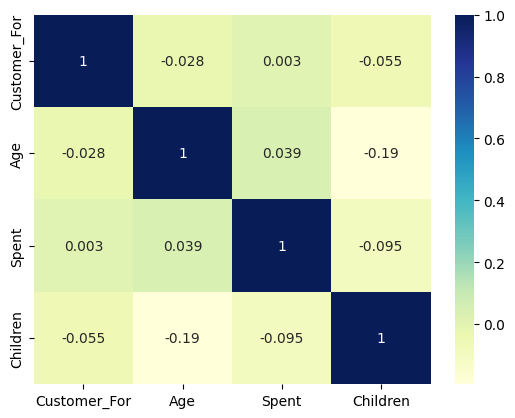

In [ ]:
# Daftar fitur numerik
numeric_features = df.select_dtypes(include=np.number).columns.tolist()

# Membuat DataFrame baru hanya dengan fitur numerik
df_numeric = df[numeric_features]

# Membuat matriks korelasi
correlation_matrix = df_numeric.corr()

# Menampilkan matriks korelasi menggunakan heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

## **i.**
Lakukan langkah-langkah berikut untuk melakukan praproses data (data **preprocessing**):
* Dapatkan daftar categorical features, lalu beri label encoding fitur kategoris (tipe data objek)
* Buatlah subset dataframe dengan menghapus fitur terkait penawaran yang diterima dan promosi ('AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response')
* Normalisasikan fitur menggunakan StandardScaler
* Gunakan scaled data untuk mengurangi dimensi

In [ ]:
# Dapatkan daftar categorical features dan lakukan label encoding
categorical_features = df.select_dtypes(include='object').columns.tolist()
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Buat subset dataframe dengan menghapus fitur terkait penawaran
excluded_features = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
subset_df = df.drop(excluded_features, axis=1)

# Hapus kolom dengan tipe data datetime
subset_df = subset_df.select_dtypes(exclude='datetime64')

# Normalisasikan fitur menggunakan StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_df)

# Gunakan scaled data untuk mengurangi dimensi menggunakan PCA
pca = PCA()
reduced_data = pca.fit_transform(scaled_data)

## **j.**
Lakukan ***dimensionality reduction*** menjadi 3 fitur menggunakan *Principal Component Analysis* (PCA). ***Dimensionality reduction*** adalah proses mengurangi jumlah variabel acak dengan pertimbangan, dengan memperoleh satu set variabel utama. PCA adalah teknik untuk mengurangi dimensi kumpulan data tersebut, meningkatkan interpretasi tetapi pada saat yang sama meminimalkan kehilangan informasi.

In [ ]:
# Membuat objek PCA dengan 3 komponen
pca = PCA(n_components=3)

# Melakukan reduksi dimensi menggunakan PCA
reduced_data = pca.fit_transform(scaled_data)

# Membuat DataFrame baru untuk hasil reduksi dimensi
reduced_df = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2', 'PC3'])

# Menampilkan hasil reduksi dimensi
print(reduced_df.head())

        PC1       PC2       PC3
0  2.077039 -2.270590 -0.720187
1 -2.348196  1.493742  0.769414
2  2.221725  0.464363  0.359478
3 -2.420926  0.422724 -0.649413
4 -0.677507 -1.787479 -0.672971


## **k.**
Lakukan pengelompokan menggunakan 3 metode ***clustering*** yang berbeda dan visualisasikan hasil pengelompokan:
* **K-Means Clustering** (gunakan metode *Elbow* untuk mencari jumlah cluster yang akan dibentuk)
* **Agglomerative Clustering** (gunakan *dendrogram* untuk mencari jumlah cluster yang akan dibentuk)
* **DBSCAN** (gunakan nilai *radius/epsilon* dan *MinPoints* yang berbeda)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


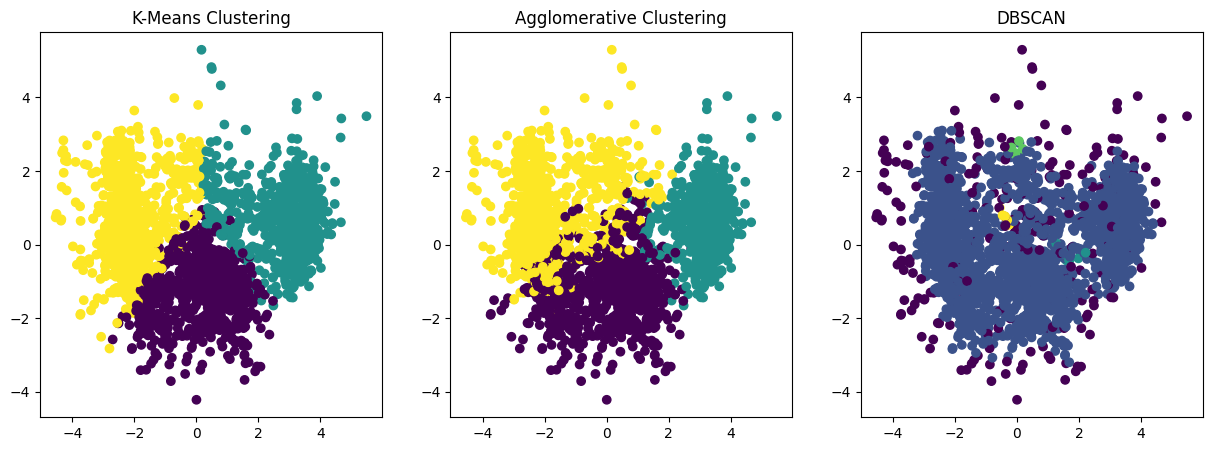

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_data)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(reduced_data)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(reduced_data)

# Visualisasi hasil pengelompokan
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# K-Means Clustering
axes[0].scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels)
axes[0].set_title('K-Means Clustering')

# Agglomerative Clustering
axes[1].scatter(reduced_data[:, 0], reduced_data[:, 1], c=agg_labels)
axes[1].set_title('Agglomerative Clustering')

# DBSCAN
axes[2].scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels)
axes[2].set_title('DBSCAN')

plt.show()

## **l.**
Analisis hasil *cluster* yang terbentuk.

**Analisis hasil cluster yang terbentuk** dari proses pengelompokan menggunakan metode K-Means, Agglomerative, dan DBSCAN dapat memberikan pemahaman tentang struktur dan karakteristik data yang sedang diolah. Berikut adalah hasil analisis hasil cluster dari proses sebelumnya:


**K-Means Clustering**:
* K-Means menghasilkan 3 cluster berdasarkan fitur-fitur yang telah direduksi.
* Cluster-cluster tersebut memiliki pusat yang ditentukan oleh centroid.
* Setiap data akan diberi label cluster yang sesuai berdasarkan kedekatan dengan centroid terdekat.
* Analisis dapat dilakukan dengan melihat karakteristik atau pola yang muncul pada setiap cluster, misalnya, apakah ada perbedaan yang signifikan antara cluster-cluster tersebut dalam hal fitur-fitur yang diamati.
* Dapat juga dilakukan perbandingan performa K-Means dengan jumlah cluster yang berbeda menggunakan metode Elbow untuk menentukan jumlah cluster yang optimal.

**Agglomerative Clustering**:
* Agglomerative Clustering menghasilkan dendrogram yang menggambarkan hubungan antara data.
* Dendrogram membantu dalam menentukan jumlah cluster yang optimal berdasarkan jarak antara cluster-cluster yang terbentuk.
* Dapat juga memutuskan jumlah cluster berdasarkan tingkat pemotongan dendrogram yang menghasilkan cluster-cluster yang signifikan.
* Analisis dapat dilakukan dengan mengamati karakteristik setiap cluster, serta hubungan hierarkis antara cluster-cluster tersebut.

**DBSCAN**:
* DBSCAN mengidentifikasi cluster berdasarkan kepadatan data.
* Data yang memiliki kepadatan yang cukup tinggi akan tergabung dalam satu cluster, sedangkan data yang jarang akan dianggap sebagai noise atau outlier.
* Dapat dilakukan penyesuaian parameter epsilon (radius) dan MinPoints untuk mengontrol tingkat kepadatan yang digunakan dalam membentuk cluster.
* Analisis dapat dilakukan dengan mempelajari karakteristik setiap cluster yang terbentuk, serta mengidentifikasi data sebagai noise atau outlier.